In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import re
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from wordcloud import wordcloud
nltk.download('stopwords')
nltk.download('wordnet')
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
/kaggle/input/us-election-2020-tweets/hashtag_donaldtrump.csv
/kaggle/input/us-election-2020-tweets/hashtag_joebiden.csv


In [2]:
from textblob import TextBlob
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.sentiment.util import *

In [3]:
!pip install twython

ERROR: Could not find a version that satisfies the requirement twython (from versions: none)
ERROR: No matching distribution found for twython


# READING CSVs INTO DATAFRAMES

In [4]:
trump=pd.read_csv('/kaggle/input/us-election-2020-tweets/hashtag_donaldtrump.csv',lineterminator='\n')

In [5]:
biden=pd.read_csv('/kaggle/input/us-election-2020-tweets/hashtag_joebiden.csv',lineterminator='\n')

In [6]:
trump

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970914,2020-11-08 23:59:43,1.325589e+18,@PelleX @Mikerger @spiegelbilderz_ @BertiFranz...,0.0,0.0,Twitter Web App,3.427951e+09,Alexander P. Vogt,APVogt,Wenn das Aussprechen der Wahrheit »den Falsche...,...,2106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 17:47:56.036006
970915,2020-11-08 23:59:48,1.325589e+18,JOE BIDEN WHY JOE BIDEN DID WINNED ?? TRUMP TR...,4.0,0.0,Twitter Web App,3.245258e+09,ahzy,ahhhzy,NaN,...,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 17:47:55.715870
970916,2020-11-08 23:59:53,1.325589e+18,#AfD|ler reagieren panisch bis hysterisch auf ...,25.0,4.0,Twitter Web App,9.866108e+17,watchdog,wilke_tobias,Quis custodiet ipsos custodes?\n\nTV Journalis...,...,3014.0,Saxony/GER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 17:47:55.975868
970917,2020-11-08 23:59:54,1.325589e+18,"@sammelbis1998 @iheartmindy @bnorthg First, yo...",0.0,0.0,Twitter for iPad,7.687811e+08,Debra,drdeblk,MD. Autism specialist. Film lover. #DumpTrump2020,...,1079.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 17:47:56.012674


In [7]:
biden

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:18,1.316529e+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,8.099044e+08,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",...,6628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.517827283
2,2020-10-15 00:00:20,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,...,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566
3,2020-10-15 00:00:21,1.316529e+18,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,8.242596e+17,Michelle Ferg,MichelleFerg4,NaN,...,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.553481849
4,2020-10-15 00:00:22,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,...,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776881,2020-11-08 23:59:38,1.325589e+18,Stop laying @CNN !\n#Paris and #London dont gi...,0.0,0.0,Twitter for iPhone,3.873620e+08,flaquet,flaquet1,NaN,...,27.0,PARIS,48.856697,2.351462,Paris,France,Europe,Ile-de-France,IDF,2020-11-09 18:32:45.613547
776882,2020-11-08 23:59:38,1.325589e+18,Ωχ ελπίζω να μη μας βγει σαν τους οπαδούς του...,0.0,0.0,Twitter for Android,4.032819e+08,οχι άλλο κάρβουνο 🇬🇷🗣🗣🗣,anapodoi,ακραία καιρικά φαινόμενα... ζήσαμε και απόψε,...,772.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 18:32:45.947617
776883,2020-11-08 23:59:41,1.325589e+18,L'OTAN va sortir de sa léthargie et redevenir ...,48.0,14.0,Twitter for Android,7.819183e+17,🇫🇷 Alt-Droite (matricule 6921) ✝️ 🇬🇷 🇮🇹 🇦🇲,CtrlAltDroite,Fils de mineur. Libertés - Identité - Solidari...,...,15806.0,France,46.603354,1.888334,NaN,France,Europe,NaN,NaN,2020-11-09 18:32:45.627335
776884,2020-11-08 23:59:52,1.325589e+18,🌎\n\n“#congiuntifuoriregione”\n\n‘Sono felice ...,1.0,1.0,Twitter for iPhone,5.293315e+08,Angelo Tani,AngeloTani,nato a casa dei nonni,...,5974.0,🌎,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 18:32:45.599846


In [8]:
trump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970919 entries, 0 to 970918
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            970919 non-null  object 
 1   tweet_id              970919 non-null  float64
 2   tweet                 970919 non-null  object 
 3   likes                 970919 non-null  float64
 4   retweet_count         970919 non-null  float64
 5   source                970043 non-null  object 
 6   user_id               970919 non-null  float64
 7   user_name             970903 non-null  object 
 8   user_screen_name      970919 non-null  object 
 9   user_description      869653 non-null  object 
 10  user_join_date        970919 non-null  object 
 11  user_followers_count  970919 non-null  float64
 12  user_location         675966 non-null  object 
 13  lat                   445719 non-null  float64
 14  long                  445719 non-null  float64
 15  

In [9]:
biden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776886 entries, 0 to 776885
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            776886 non-null  object 
 1   tweet_id              776886 non-null  float64
 2   tweet                 776886 non-null  object 
 3   likes                 776886 non-null  float64
 4   retweet_count         776886 non-null  float64
 5   source                776173 non-null  object 
 6   user_id               776886 non-null  float64
 7   user_name             776868 non-null  object 
 8   user_screen_name      776886 non-null  object 
 9   user_description      694880 non-null  object 
 10  user_join_date        776886 non-null  object 
 11  user_followers_count  776886 non-null  float64
 12  user_location         543095 non-null  object 
 13  lat                   355293 non-null  float64
 14  long                  355293 non-null  float64
 15  

**We'll let the nulls be since only tweets is the feature of our interest and it doesn't have any null**

In [10]:
trump.isna().sum()

created_at                   0
tweet_id                     0
tweet                        0
likes                        0
retweet_count                0
source                     876
user_id                      0
user_name                   16
user_screen_name             0
user_description        101266
user_join_date               0
user_followers_count         0
user_location           294953
lat                     525200
long                    525200
city                    743732
country                 528171
continent               528154
state                   650299
state_code              670494
collected_at                 0
dtype: int64

In [11]:
biden.isna().sum()

created_at                   0
tweet_id                     0
tweet                        0
likes                        0
retweet_count                0
source                     713
user_id                      0
user_name                   18
user_screen_name             0
user_description         82006
user_join_date               0
user_followers_count         0
user_location           233791
lat                     421593
long                    421593
city                    590014
country                 423107
continent               423089
state                   516691
state_code              532277
collected_at                 0
dtype: int64

**Concatenating both the dataframes**

In [12]:
#WE'LL BE CONSIDERING TWEETS COL AND COUNTRY(==USA) COL
trump['candidate']='Trump'
biden['candidate']='Biden'
df=pd.concat([trump,biden])

# EDA On New df

In [13]:
df.shape

(1747805, 22)

<AxesSubplot:xlabel='candidate'>

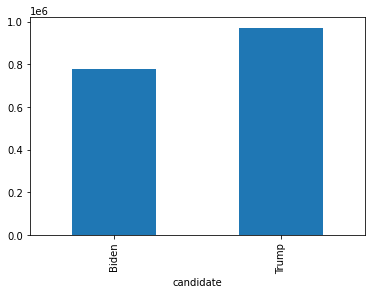

In [14]:
df.groupby(['candidate'])['tweet'].count().plot.bar()

<AxesSubplot:xlabel='candidate'>

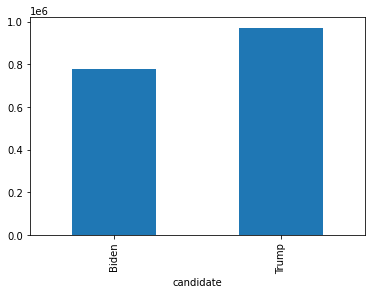

In [15]:
df.groupby(['candidate'])['likes'].count().plot.bar()

In [16]:
df.country.value_counts()

United States of America    332495
United States                61905
United Kingdom               58051
India                        40091
Germany                      35379
                             ...  
Mali                             2
Northern Mariana Islands         1
Saint Lucia                      1
Lesotho                          1
East Timor                       1
Name: country, Length: 189, dtype: int64

In [17]:
df['country']=df['country'].replace({'United States of America':'US','United States':'US'})

In [18]:
df.country.value_counts()

US                          394400
United Kingdom               58051
India                        40091
Germany                      35379
France                       35299
                             ...  
Mali                             2
Northern Mariana Islands         1
Saint Lucia                      1
Lesotho                          1
East Timor                       1
Name: country, Length: 188, dtype: int64

<AxesSubplot:xlabel='country'>

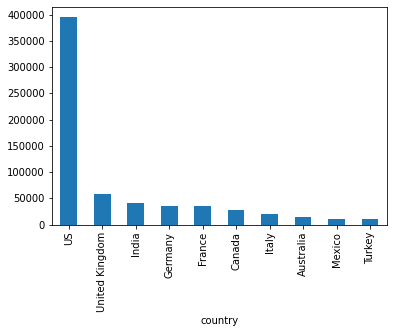

In [19]:
df.groupby('country')['tweet'].count().sort_values(ascending=False).head(10).plot.bar()

**Countries with higher number of tweets will be saved in a list for future use**

In [20]:
top10=df.groupby('country')['tweet'].count().sort_values(ascending=False).head(10).index.tolist()
top10

['US',
 'United Kingdom',
 'India',
 'Germany',
 'France',
 'Canada',
 'Italy',
 'Australia',
 'Mexico',
 'Turkey']

In [21]:
tweet_df=df.groupby(['country','candidate'])['tweet'].count().reset_index()

In [22]:
tweet_df

,country,candidate,tweet
0,Afghanistan,Biden,119
1,Afghanistan,Trump,101
2,Albania,Biden,61
3,Albania,Trump,74
4,Algeria,Biden,24
...,...,...,...
363,Yemen,Trump,93
364,Zambia,Biden,33
365,Zambia,Trump,38
366,Zimbabwe,Biden,59


**KEEPING ONLY DATA CONTRIBUTING MORE STRENGTH TO THE df**

In [23]:
tweet_df=tweet_df[tweet_df['country'].isin(top10)]
tweet_df

,country,candidate,tweet
16,Australia,Biden,5534
17,Australia,Trump,9365
54,Canada,Biden,10809
55,Canada,Trump,16996
112,France,Biden,14610
113,France,Trump,20689
118,Germany,Biden,12761
119,Germany,Trump,22618
146,India,Biden,21532
147,India,Trump,18559


In [24]:
len(tweet_df.country.unique())

10

<AxesSubplot:xlabel='country', ylabel='tweet'>

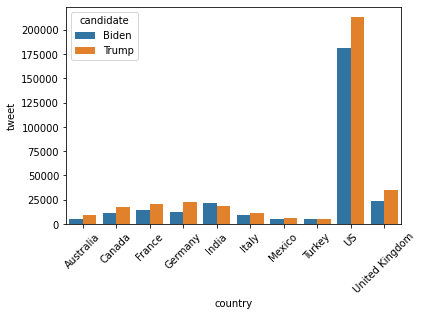

In [25]:
plt.xticks(rotation=45)
sns.barplot(data=tweet_df,x='country',y='tweet',hue='candidate')

**TEXT PREPROCESSING/MINING**

In [26]:
ls=WordNetLemmatizer()

In [27]:
def clean_txt(txt):
    txt=str(txt).lower()
    txt=re.sub('[^a-z]',' ',str(txt))
    wrds=txt.split()
    txt=[ls.lemmatize(j) for j in wrds if j not in set(stopwords.words('english'))] 
    txt=' '.join(str(k) for k in txt)
    return txt

In [28]:
trump_tweets=df.query("(candidate =='Trump')").sort_values('user_followers_count',ascending=False).drop_duplicates(['user_id'])[['tweet','country']]

In [29]:
trump_tweets

,tweet,country
155941,"A menos de 2 semanas de las elecciones, #JoeBi...",NaN
913717,"Dalam pernyataan terbaru via Twitter, Trump ke...",Indonesia
825004,#Opinion | What appears to have cost #Trump th...,India
47094,#Trump uses own #COVID19 recovery to push retu...,China
916961,Six things #JoeBiden will likely do on immigra...,India
...,...,...
795421,Il voto USA sancirà nuovi equilibri politici. ...,NaN
96623,#Trump really believes listening to the leader...,NaN
535169,É hoje que a esquerda infarta de vez🤣🤣🤣🤣. Go #...,NaN
643884,#DonaldTrump #2020Election #Biden #DonaldJTrum...,NaN


In [30]:
trump_tweets=trump_tweets.loc[trump_tweets['country']=='US']
trump_tweets

,tweet,country
920743,"Without a doubt, the #FourSeasons debacle is t...",US
115369,"President Donald #Trump’s youngest daughter, T...",US
270220,Woah. Have you read this article?\n\nAll the p...,US
921527,The latest episode of #SNL tackled #DonaldTrum...,US
935247,🇺🇸 #Decision2020: @JoeBiden firmará una serie ...,US
...,...,...
849355,"Twisted, pressed &amp; curled almost empty too...",US
795745,#Election2020\n#USElectionResults2020\n#Donald...,US
68263,"Seeing a pro-right, made up by a person pardon...",US
732264,Watching this poor guy on @FoxNews explain rea...,US


In [31]:
trump_tweets.isna().sum()

tweet      0
country    0
dtype: int64

In [32]:
#trump_tweets.drop('cleantxt',axis=1,inplace=True)
trump_tweets['cleantxt']=trump_tweets['tweet'].apply(clean_txt)

In [33]:
trump_tweets

,tweet,country,cleantxt
920743,"Without a doubt, the #FourSeasons debacle is t...",US,without doubt fourseasons debacle best part do...
115369,"President Donald #Trump’s youngest daughter, T...",US,president donald trump youngest daughter tiffa...
270220,Woah. Have you read this article?\n\nAll the p...,US,woah read article president debt donald trump ...
921527,The latest episode of #SNL tackled #DonaldTrum...,US,latest episode snl tackled donaldtrump loss co...
935247,🇺🇸 #Decision2020: @JoeBiden firmará una serie ...,US,decision joebiden firmar una serie de rdenes e...
...,...,...,...
849355,"Twisted, pressed &amp; curled almost empty too...",US,twisted pressed amp curled almost empty toothp...
795745,#Election2020\n#USElectionResults2020\n#Donald...,US,election uselectionresults donaldtrump since t...
68263,"Seeing a pro-right, made up by a person pardon...",US,seeing pro right made person pardoned trump do...
732264,Watching this poor guy on @FoxNews explain rea...,US,watching poor guy foxnews explain reality trum...


# CREATING USEFUL FEATURES

polarity--> how much text is positive, negative or neutral [ +1,0,-1 ]<br>
`TextBlob(text).sentiment.polarity`<br>
subjectivity-->if a sentence is subjective/objective<br>
(ie)'subjective' refers to personal opinions/interests, etc.,<br>
and 'objective' refers to general facts<br>
`TextBlob(text).sentiment.subjectivity`<br>

In [34]:
def get_polarity(txt):
    return TextBlob(txt).sentiment.polarity
def get_subjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity
def polarity_score(score):
    if score<0:
        return "negative"
    elif score==0:
        return "neutral"
    else:
        return "positive"

In [35]:
trump_tweets['polarity']=trump_tweets['cleantxt'].apply(get_polarity)

In [36]:
trump_tweets['subjectivity']=trump_tweets['cleantxt'].apply(get_subjectivity)

In [37]:
trump_tweets['sentiment']=trump_tweets['polarity'].apply(polarity_score)

In [38]:
trump_tweets

,tweet,country,cleantxt,polarity,subjectivity,sentiment
920743,"Without a doubt, the #FourSeasons debacle is t...",US,without doubt fourseasons debacle best part do...,0.333333,0.483333,positive
115369,"President Donald #Trump’s youngest daughter, T...",US,president donald trump youngest daughter tiffa...,0.000000,0.000000,neutral
270220,Woah. Have you read this article?\n\nAll the p...,US,woah read article president debt donald trump ...,0.000000,0.000000,neutral
921527,The latest episode of #SNL tackled #DonaldTrum...,US,latest episode snl tackled donaldtrump loss co...,-0.033333,0.800000,negative
935247,🇺🇸 #Decision2020: @JoeBiden firmará una serie ...,US,decision joebiden firmar una serie de rdenes e...,0.000000,0.000000,neutral
...,...,...,...,...,...,...
849355,"Twisted, pressed &amp; curled almost empty too...",US,twisted pressed amp curled almost empty toothp...,-0.153333,0.580000,negative
795745,#Election2020\n#USElectionResults2020\n#Donald...,US,election uselectionresults donaldtrump since t...,0.000000,0.000000,neutral
68263,"Seeing a pro-right, made up by a person pardon...",US,seeing pro right made person pardoned trump do...,-0.282857,0.447143,negative
732264,Watching this poor guy on @FoxNews explain rea...,US,watching poor guy foxnews explain reality trum...,-0.362500,0.900000,negative


**REPEATING THE ABOVE STEPS FOR biden df ALSO**

In [39]:
biden_tweets=df.query("(candidate == 'Biden')").sort_values('user_followers_count',ascending=False).drop_duplicates(['user_id'])[['tweet','country']]

In [40]:
biden_tweets

,tweet,country
287365,Vote early! Vote Tuesday! Vote #Biden! #vote h...,NaN
636105,#Election2020 #PresidentElectJoe #JoeBiden htt...,NaN
738532,"Desde #California a #NuevaYork, muchos están c...",NaN
744750,Joe Biden dan Kamala Harris memang dalam pemil...,Indonesia
710408,President-elect #JoeBiden and Vice-President-e...,India
...,...,...
734356,"""Spread the hope.""\n~Joe Biden\n\n#joebiden #e...",NaN
284600,NEW GLOBAL UPDATE FOR OUR ELECTION GAME! START...,NaN
734349,@realDonaldTrump It’s like monopoly.. #JoeBide...,US
653112,IT’S OVER!\n#Biden #Harris #AmericaDecides htt...,The Netherlands


In [41]:
biden_tweets=biden_tweets[biden_tweets['country']=='US']
biden_tweets

,tweet,country
175650,#JoeBiden is enlisting A-list star power to he...,US
735142,While we were campaigning across battleground ...,US
343145,The big fight TODAY!!!!! @realDonaldTrump vs #...,US
586959,News outlets have projected that #JoeBiden has...,US
709825,"During his victory speech, #JoeBiden said he u...",US
...,...,...
135471,"#JoeBiden's best four quotes of the debate ""I ...",US
347694,Biden IS going to win tonight. #biden #Electio...,US
734572,All 238k deaths recorded in the United States ...,US
321040,Joe Biden'in başa gelmesi bizim bence işimize ...,US


In [42]:
biden_tweets['cleantxt']=biden_tweets['tweet'].apply(clean_txt)

In [43]:
biden_tweets

,tweet,country,cleantxt
175650,#JoeBiden is enlisting A-list star power to he...,US,joebiden enlisting list star power help close ...
735142,While we were campaigning across battleground ...,US,campaigning across battleground state ran grea...
343145,The big fight TODAY!!!!! @realDonaldTrump vs #...,US,big fight today realdonaldtrump v joebiden got...
586959,News outlets have projected that #JoeBiden has...,US,news outlet projected joebiden secured elector...
709825,"During his victory speech, #JoeBiden said he u...",US,victory speech joebiden said understood trump ...
...,...,...,...
135471,"#JoeBiden's best four quotes of the debate ""I ...",US,joebiden best four quote debate made mistake l...
347694,Biden IS going to win tonight. #biden #Electio...,US,biden going win tonight biden electionday http...
734572,All 238k deaths recorded in the United States ...,US,k death recorded united state covid alone coz ...
321040,Joe Biden'in başa gelmesi bizim bence işimize ...,US,joe biden ba gelmesi bizim bence imize gelir n...


In [44]:
biden_tweets['polarity']=biden_tweets['cleantxt'].apply(get_polarity)
biden_tweets['subjectivity']=biden_tweets['cleantxt'].apply(get_subjectivity)
biden_tweets['sentiment']=biden_tweets['polarity'].apply(polarity_score)

In [45]:
biden_tweets

,tweet,country,cleantxt,polarity,subjectivity,sentiment
175650,#JoeBiden is enlisting A-list star power to he...,US,joebiden enlisting list star power help close ...,0.000000,0.000000,neutral
735142,While we were campaigning across battleground ...,US,campaigning across battleground state ran grea...,0.800000,0.750000,positive
343145,The big fight TODAY!!!!! @realDonaldTrump vs #...,US,big fight today realdonaldtrump v joebiden got...,0.000000,0.100000,neutral
586959,News outlets have projected that #JoeBiden has...,US,news outlet projected joebiden secured elector...,0.000000,0.000000,neutral
709825,"During his victory speech, #JoeBiden said he u...",US,victory speech joebiden said understood trump ...,-0.750000,0.750000,negative
...,...,...,...,...,...,...
135471,"#JoeBiden's best four quotes of the debate ""I ...",US,joebiden best four quote debate made mistake l...,0.500000,0.200000,positive
347694,Biden IS going to win tonight. #biden #Electio...,US,biden going win tonight biden electionday http...,0.800000,0.400000,positive
734572,All 238k deaths recorded in the United States ...,US,k death recorded united state covid alone coz ...,-0.006061,0.217576,negative
321040,Joe Biden'in başa gelmesi bizim bence işimize ...,US,joe biden ba gelmesi bizim bence imize gelir n...,0.000000,0.000000,neutral


# VIEWING FINAL RESULTS

In [46]:
trump_tweets.sentiment.value_counts(normalize=True)*100

neutral     45.725224
positive    34.293918
negative    19.980858
Name: sentiment, dtype: float64

In [47]:
biden_tweets.sentiment.value_counts(normalize=True)*100

neutral     47.226679
positive    38.471235
negative    14.302086
Name: sentiment, dtype: float64

# INFERENCE:
**Thus from the analysis, it is evident that out of election_2020_tweets in english /english-mixed/english-like languages, within the country of USA, there were higher positivity and neutrality in tweets regarding president Biden relative to the candidate Trump**